In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import warnings

df=pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
categorial_cols=['Month', 'VisitorType']
df_processed = pd.get_dummies(df, columns=categorial_cols, drop_first=True)

In [9]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


--- [Bước 1 & 2: Tải và Tiền xử lý Dữ liệu] ---
Tải dữ liệu thành công!
Đã chuyển đổi 2 cột chữ thành các cột số.
Đã chuyển đổi các cột True/False thành 1/0.

--- [Bước 3: Chia Dữ Liệu (Train/Test Split)] ---
Tổng số mẫu: 12330
Số mẫu huấn luyện (X_train): 9864
Số mẫu kiểm thử (X_test): 2466
Tỷ lệ Revenue=1 trong tập huấn luyện: 15.47%
Tỷ lệ Revenue=1 trong tập kiểm thử: 15.49%

--- [Bước 4: Chuẩn Hóa Dữ Liệu (Scaling)] ---
Đã chuẩn hóa dữ liệu train và test.

--- [Bước 5: Huấn Luyện Mô Hình (SVM)] ---
Đã huấn luyện xong mô hình SVC!

--- [Bước 6: Đánh Giá Mô Hình] ---
Kết quả dự đoán đã có. Bây giờ so sánh với kết quả thật (y_test)...

--- Báo cáo Phân loại (Classification Report) ---
               precision    recall  f1-score   support

0 (Không mua)       0.94      0.90      0.92      2084
 1 (Mua hàng)       0.56      0.71      0.63       382

     accuracy                           0.87      2466
    macro avg       0.75      0.80      0.77      2466
 weighted avg       0.88    

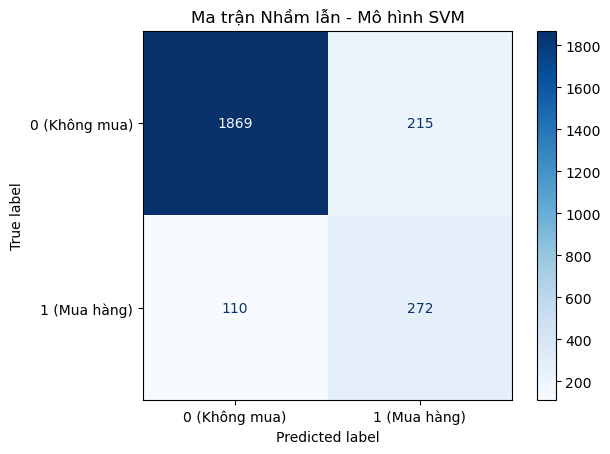

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC  # Sử dụng SVM như trong slide [cite: 1747, 1757]
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import warnings

# Tắt các cảnh báo để kết quả gọn gàng hơn
warnings.filterwarnings('ignore')

print("--- [Bước 1 & 2: Tải và Tiền xử lý Dữ liệu] ---")

# --- Bước 1: Tải Dữ Liệu ---
try:
    df = pd.read_csv('online_shoppers_intention.csv')
    print("Tải dữ liệu thành công!")
except FileNotFoundError:
    print("LỖI: Không tìm thấy tệp 'online_shoppers_intention.csv'.")
    exit()

# --- Bước 2: Tiền xử lý Dữ liệu ---
# Mục tiêu: Chuyển đổi tất cả các cột thành SỐ.

# 2.1. Chuyển đổi các cột chữ (Categorical)
# Dùng pd.get_dummies để chuyển 'Month' và 'VisitorType' thành các cột 0/1
categorical_cols = ['Month', 'VisitorType']
df_processed = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print(f"Đã chuyển đổi {len(categorical_cols)} cột chữ thành các cột số.")

# 2.2. Chuyển đổi các cột Logic (Boolean)
# Chuyển 'Weekend' và 'Revenue' (đích) từ True/False thành 1/0
df_processed['Weekend'] = df_processed['Weekend'].astype(int)
df_processed['Revenue'] = df_processed['Revenue'].astype(int)
print("Đã chuyển đổi các cột True/False thành 1/0.")


print("\n--- [Bước 3: Chia Dữ Liệu (Train/Test Split)] ---")

# 3.1. Xác định X (Đặc trưng) và y (Mục tiêu)
X = df_processed.drop('Revenue', axis=1)  # X là tất cả các cột TRỪ 'Revenue'
y = df_processed['Revenue']                # y CHỈ là cột 'Revenue'

# 3.2. Chia dữ liệu
# Chúng ta dùng test_size=0.2 (20% để kiểm thử, 80% để huấn luyện)
# QUAN TRỌNG: Dùng 'stratify=y'
# Vì dữ liệu của chúng ta mất cân bằng (chỉ 15.5% là 'Revenue'=1),
# 'stratify=y' đảm bảo rằng cả tập train và test đều có tỷ lệ 15.5% này.
# Đây là kỹ thuật được đề cập trong slide (StratifiedKFold) [cite: 2004, 2015]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

print(f"Tổng số mẫu: {len(df)}")
print(f"Số mẫu huấn luyện (X_train): {len(X_train)}")
print(f"Số mẫu kiểm thử (X_test): {len(X_test)}")
print(f"Tỷ lệ Revenue=1 trong tập huấn luyện: {y_train.mean():.2%}")
print(f"Tỷ lệ Revenue=1 trong tập kiểm thử: {y_test.mean():.2%}")


print("\n--- [Bước 4: Chuẩn Hóa Dữ Liệu (Scaling)] ---")
# Các mô hình như SVM và KNN rất nhạy cảm với thang đo của dữ liệu.
# Ví dụ: Cột 'ProductRelated_Duration' (từ 0 đến 60000) sẽ "lấn át"
# cột 'SpecialDay' (từ 0 đến 1).
# Chúng ta phải chuẩn hóa chúng.

scaler = StandardScaler()

# 4.1. CHỈ 'fit_transform' trên X_train
# Mô hình CHỈ được học thang đo từ dữ liệu huấn luyện
X_train_scaled = scaler.fit_transform(X_train)

# 4.2. CHỈ 'transform' trên X_test
# Áp dụng thang đo đã học được từ X_train cho X_test
X_test_scaled = scaler.transform(X_test)

print("Đã chuẩn hóa dữ liệu train và test.")


print("\n--- [Bước 5: Huấn Luyện Mô Hình (SVM)] ---")
# Chúng ta sẽ dùng mô hình Support Vector Machine (SVC)
# 'kernel="linear"' giống như ví dụ trong slide của bạn [cite: 1759]
# 'random_state=42' để đảm bảo kết quả có thể tái lập
model_svm = SVC(kernel='linear',class_weight='balanced', random_state=42)

# Bắt đầu quá trình học!
model_svm.fit(X_train_scaled, y_train)

print(f"Đã huấn luyện xong mô hình {model_svm.__class__.__name__}!")


print("\n--- [Bước 6: Đánh Giá Mô Hình] ---")
# Dùng mô hình đã huấn luyện để dự đoán trên dữ liệu kiểm thử (dữ liệu mới)
y_pred = model_svm.predict(X_test_scaled)

print("Kết quả dự đoán đã có. Bây giờ so sánh với kết quả thật (y_test)...")

# 6.1. Báo cáo Phân loại (Classification Report)
# Đây là kết quả quan trọng nhất, cho thấy Precision, Recall, và F1-score [cite: 1843, 1916]
report = classification_report(y_test, y_pred, 
                             target_names=['0 (Không mua)', '1 (Mua hàng)'])
print("\n--- Báo cáo Phân loại (Classification Report) ---")
print(report)

# 6.2. Ma trận Nhầm lẫn (Confusion Matrix) [cite: 1841, 1856]
print("\n--- Ma trận Nhầm lẫn (Confusion Matrix) ---")
# [[True Negative (TN), False Positive (FP)],
#  [False Negative (FN), True Positive (TP)]]
cm = confusion_matrix(y_test, y_pred)
print(cm)

# 6.3. Vẽ ma trận nhầm lẫn cho đẹp
print("Đang vẽ ma trận nhầm lẫn...")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                            display_labels=['0 (Không mua)', '1 (Mua hàng)'])
disp.plot(cmap="Blues")
plt.title("Ma trận Nhầm lẫn - Mô hình SVM")
plt.show() # Lệnh này sẽ mở một cửa sổ đồ thị